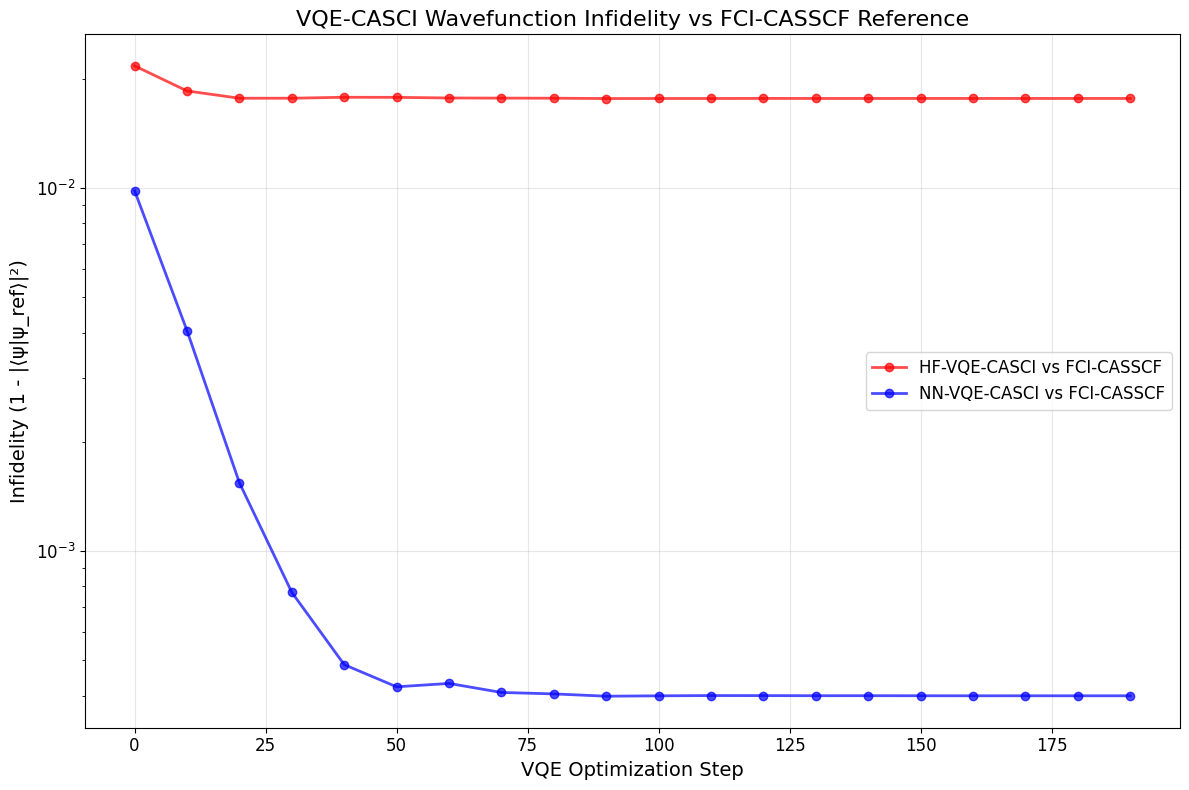


SUMMARY
FCI-CASSCF reference energy:  -2.15180426 Ha
HF-VQE-CASCI final energy:     -2.12351377 Ha
NN-VQE-CASCI final energy:     -2.15071730 Ha

Energy differences from FCI-CASSCF:
HF-VQE-CASCI: 28.290 mHa
NN-VQE-CASCI: 1.087 mHa

Final infidelities vs FCI-CASSCF:
HF-VQE-CASCI: 1.767769e-02
NN-VQE-CASCI: 3.993496e-04
Infidelity ratio (NN/HF): 0.02


In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BOND_LENGTH = 0.7

def load_results(bond_length, results_dir="Data"):
    filename = f"{results_dir}/vqe_casci_results_bond({bond_length}).json"
    if Path(filename).exists():
        with open(filename, 'r') as f:
            return json.load(f)
    else:
        print(f"Results file not found: {filename}")
        print("Please run the VQE experiment first.")
        return None

def plot_figure_3(bond_length=BOND_LENGTH):
    # Load results
    results = load_results(bond_length)
    if results is None:
        return
    
    # Extract data
    steps = results['infidelity_history']['steps']
    infidelities_hf = results['infidelity_history']['hf']
    infidelities_nn = results['infidelity_history']['nn']
    
    # Create figure (same as original)
    plt.figure(figsize=(12, 8))
    
    plt.semilogy(steps, infidelities_hf, 'ro-', label='HF-VQE-CASCI vs FCI-CASSCF', 
                 alpha=0.7, linewidth=2, markersize=6)
    plt.semilogy(steps, infidelities_nn, 'bo-', label='NN-VQE-CASCI vs FCI-CASSCF', 
                 alpha=0.7, linewidth=2, markersize=6)
    
    plt.xlabel('VQE Optimization Step', fontsize=14)
    plt.ylabel('Infidelity (1 - |⟨ψ|ψ_ref⟩|²)', fontsize=14)
    plt.title('VQE-CASCI Wavefunction Infidelity vs FCI-CASSCF Reference', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tick_params(axis='both', which='major', labelsize=12)
    
    plt.tight_layout()
    plt.savefig(f'vqe_casci_infidelity_vs_fci_casscf({bond_length}).png', dpi=150)
    plt.show()
    
    # Print summary
    print("\n" + "="*60)
    print("SUMMARY")
    print("="*60)
    print(f"FCI-CASSCF reference energy:  {results['reference_energy']:.8f} Ha")
    print(f"HF-VQE-CASCI final energy:     {results['hf_vqe_casci_energy']:.8f} Ha")
    print(f"NN-VQE-CASCI final energy:     {results['nn_vqe_casci_energy']:.8f} Ha")
    print(f"\nEnergy differences from FCI-CASSCF:")
    print(f"HF-VQE-CASCI: {results['energy_diff_mHa']['hf']:.3f} mHa")
    print(f"NN-VQE-CASCI: {results['energy_diff_mHa']['nn']:.3f} mHa")
    print(f"\nFinal infidelities vs FCI-CASSCF:")
    print(f"HF-VQE-CASCI: {results['final_infidelities']['hf']:.6e}")
    print(f"NN-VQE-CASCI: {results['final_infidelities']['nn']:.6e}")
    
    if results['final_infidelities']['hf'] > 0:
        ratio = results['final_infidelities']['nn'] / results['final_infidelities']['hf']
        print(f"Infidelity ratio (NN/HF): {ratio:.2f}")

if __name__ == "__main__":
    plot_figure_3(bond_length=BOND_LENGTH)  # Change bond length as needed

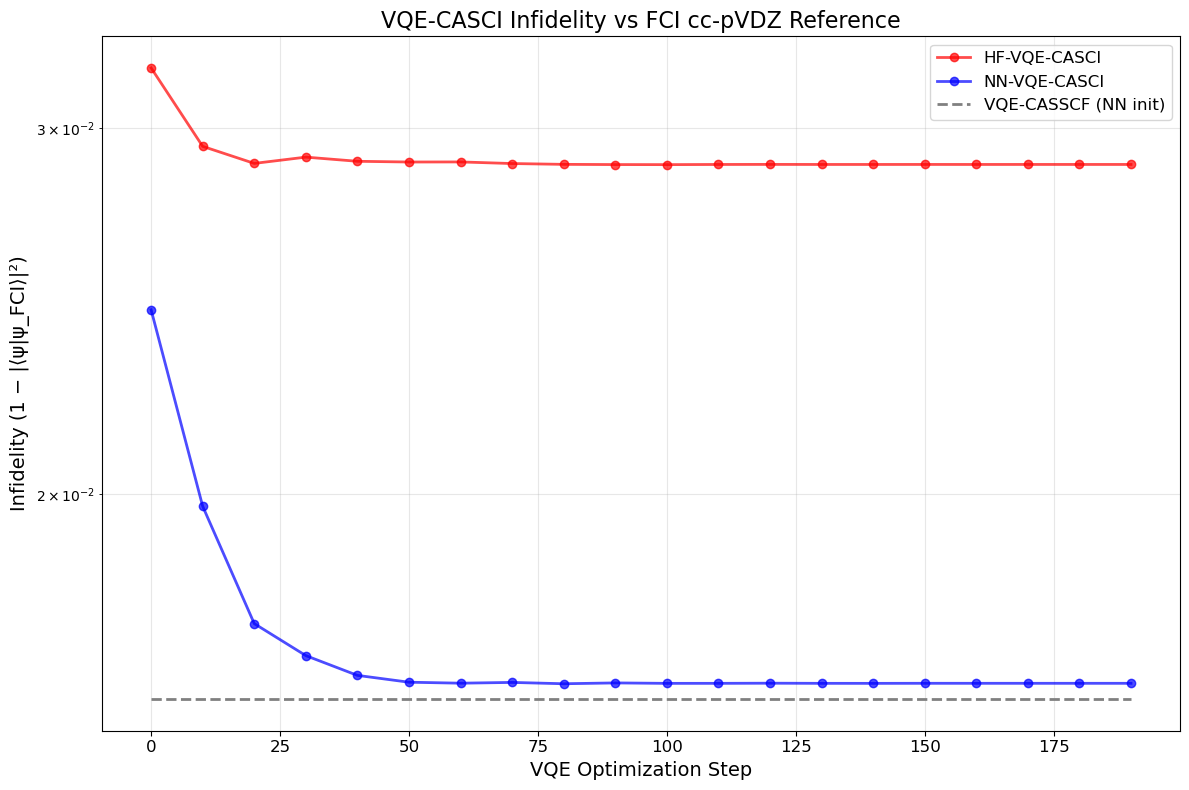


SUMMARY (Full FCI reference, cc-pVDZ, embedded)
Loaded: Data2/vqe_casci_results_bond(0.7).json
HF-VQE-CASCI final energy:  -2.12351377 Ha
NN-VQE-CASCI final energy:  -2.15071730 Ha
Full FCI total (HF basis):  -2.19441981 Ha
Full FCI total (NN basis):  -2.19441981 Ha

Final infidelities vs Full FCI:
HF-VQE-CASCI: 2.881831e-02
NN-VQE-CASCI: 1.621889e-02
Infidelity ratio (NN/HF): 0.56

VQE-CASSCF (NN init): E = -2.15180069 Ha, embedded infidelity = 1.593664e-02

Figure saved to: vqe_casci_infidelity_vs_full_fci_ccpvdz_embedded(0.7).png


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BOND_LENGTH = 0.7
RESULTS_DIR = "Data2"  # embedded results directory

def load_results(bond_length, results_dir=RESULTS_DIR):
    filename = Path(results_dir) / f"vqe_casci_results_bond({bond_length}).json"
    if filename.exists():
        with open(filename, "r") as f:
            return json.load(f), str(filename)
    else:
        print(f"Results file not found: {filename}")
        print("Please run the VQE experiment first (or check RESULTS_DIR).")
        return None, None

def plot_figure_3_full_fci(bond_length=BOND_LENGTH):
    # Load results
    results, where = load_results(bond_length)
    if results is None:
        return

    try:
        steps = results["infidelity_history_full_fci"]["steps"]
        infidelities_hf = results["infidelity_history_full_fci"]["hf"]
        infidelities_nn = results["infidelity_history_full_fci"]["nn"]
    except KeyError:
        raise KeyError(
            "Results JSON does not contain 'infidelity_history_full_fci'. "
            "Re-run the experiment with full-FCI (embedded) enabled."
        )

    grey = results["infidelity_history_full_fci"].get("casscf_nn", None)

    plt.figure(figsize=(12, 8))
    plt.semilogy(
        steps, infidelities_hf, "ro-",
        label="HF-VQE-CASCI",
        alpha=0.7, linewidth=2, markersize=6,
    )
    plt.semilogy(
        steps, infidelities_nn, "bo-",
        label="NN-VQE-CASCI",
        alpha=0.7, linewidth=2, markersize=6,
    )
    if grey is not None and len(grey) == len(steps):
        plt.semilogy(
            steps, grey, "--", color="grey",
            label="VQE-CASSCF (NN init)",
            linewidth=2,
        )

    plt.xlabel("VQE Optimization Step", fontsize=14)
    plt.ylabel("Infidelity (1 − |⟨ψ|ψ_FCI⟩|²)", fontsize=14)
    plt.title("VQE-CASCI Infidelity vs FCI cc-pVDZ Reference", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, which="both", alpha=0.3)
    plt.tick_params(axis="both", which="major", labelsize=12)

    plt.tight_layout()
    out_png = f"vqe_casci_infidelity_vs_full_fci_ccpvdz_embedded({bond_length}).png"
    plt.savefig(out_png, dpi=150)
    plt.show()

    # Summary
    print("\n" + "="*60)
    print("SUMMARY (Full FCI reference, cc-pVDZ, embedded)")
    print("="*60)
    print(f"Loaded: {where}")
    print(f"HF-VQE-CASCI final energy:  {results['hf_vqe_casci_energy']:.8f} Ha")
    print(f"NN-VQE-CASCI final energy:  {results['nn_vqe_casci_energy']:.8f} Ha")

    if "reference_full_fci_energy_hf_basis" in results:
        print(f"Full FCI total (HF basis):  {results['reference_full_fci_energy_hf_basis']:.8f} Ha")
    if "reference_full_fci_energy_nn_basis" in results:
        print(f"Full FCI total (NN basis):  {results['reference_full_fci_energy_nn_basis']:.8f} Ha")

    try:
        hf_final = results["final_infidelities_full_fci"]["hf"]
        nn_final = results["final_infidelities_full_fci"]["nn"]
        print("\nFinal infidelities vs Full FCI:")
        print(f"HF-VQE-CASCI: {hf_final:.6e}")
        print(f"NN-VQE-CASCI: {nn_final:.6e}")
        if hf_final > 0:
            print(f"Infidelity ratio (NN/HF): {nn_final / hf_final:.2f}")
    except KeyError:
        pass

    if "vqe_casscf_nn" in results:
        e_cass = results["vqe_casscf_nn"].get("energy", None)
        inf_cass = results["vqe_casscf_nn"].get("final_infidelity_full_fci", None)
        if e_cass is not None and inf_cass is not None:
            print(f"\nVQE-CASSCF (NN init): E = {e_cass:.8f} Ha, "
                  f"embedded infidelity = {inf_cass:.6e}")

    print(f"\nFigure saved to: {out_png}")

if __name__ == "__main__":
    plot_figure_3_full_fci(bond_length=BOND_LENGTH)


Saved: vqe_casci_convergence_0.7A.pdf


/var/folders/2g/30fq15_16yvcsfwpd5x9z9p80000gn/T/ipykernel_12641/597455392.py:54: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'Producer', 'ModDate', 'Title', 'Trapped', 'CreationDate', 'Author', 'Keywords', 'Creator', 'Subject'}.
  plt.savefig(out_path, metadata={"TextAsShapes": False})


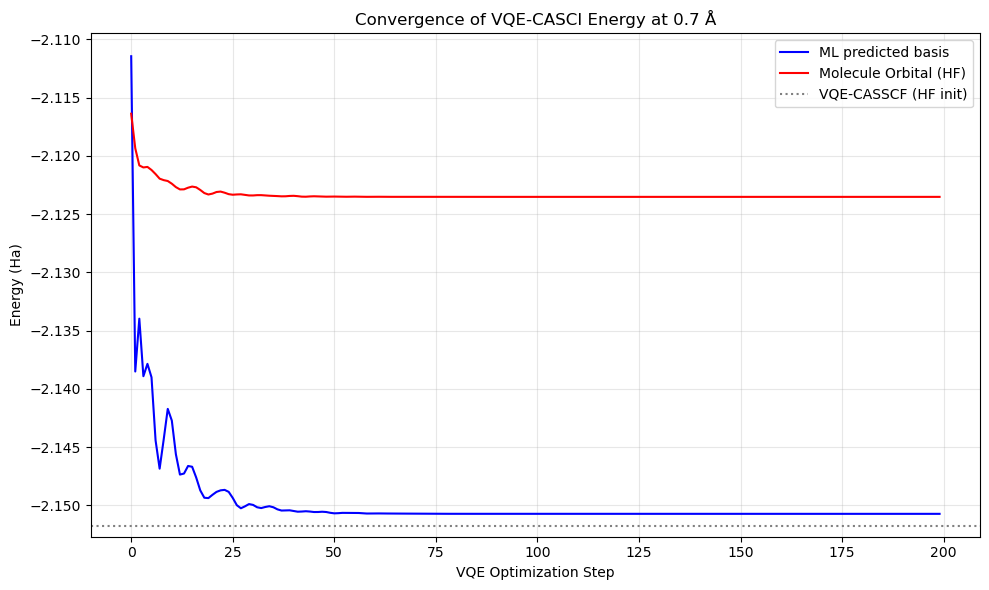

In [3]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

def load_results(bond_length, results_dir="Data"):
    filename = Path(results_dir) / f"vqe_casci_results_bond({bond_length}).json"
    if not filename.exists():
        print(f"Results file not found: {filename}")
        return None
    with open(filename, "r") as f:
        return json.load(f)

def load_vqe_casscf_energy(bond_length, path="../VQE-CASSCF/vqe_casscf_hf_energies.json"):
    jf = Path(path)
    if not jf.exists():
        print(f"[warn] VQE-CASSCF energies file not found: {jf}")
        return None
    with open(jf, "r") as f:
        data = json.load(f)
    bonds = data.get("bond_lengths_A", [])
    energies = data.get("energies_Ha", [])
    # map with 0.1 Å rounding to match filenames
    idx_by_bond = {round(float(b), 1): i for i, b in enumerate(bonds)}
    i = idx_by_bond.get(round(float(bond_length), 1))
    return float(energies[i]) if i is not None else None

def plot_convergence_curve(bond_length=0.7, results_dir="Data", save=True):
    results = load_results(bond_length, results_dir=results_dir)
    if results is None:
        return

    eh = results.get("energy_history", {})
    energy_hf = eh.get("hf", [])
    energy_nn = eh.get("nn", [])
    steps = eh.get("all_steps") or eh.get("steps") or list(range(max(len(energy_hf), len(energy_nn))))

    e_vqe_casscf = load_vqe_casscf_energy(bond_length)

    plt.figure(figsize=(10, 6))
    plt.plot(steps, energy_nn, label="ML predicted basis", color="blue")
    plt.plot(steps, energy_hf, label="Molecule Orbital (HF)", color="red")
    if e_vqe_casscf is not None:
        plt.axhline(e_vqe_casscf, linestyle=":", color="gray", label="VQE-CASSCF (HF init)")

    plt.xlabel("VQE Optimization Step")
    plt.ylabel("Energy (Ha)")
    plt.title(f"Convergence of VQE-CASCI Energy at {bond_length} Å")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    if save:
        out_path = f"vqe_casci_convergence_{bond_length}A.pdf"
        plt.savefig(out_path, metadata={"TextAsShapes": False})
        print(f"Saved: {out_path}")

    plt.show()


if __name__ == "__main__":
    plot_convergence_curve(bond_length=0.7, results_dir="Data", save=True)

/var/folders/2g/30fq15_16yvcsfwpd5x9z9p80000gn/T/ipykernel_12641/1175547131.py:100: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'Producer', 'ModDate', 'Title', 'Trapped', 'CreationDate', 'Author', 'Keywords', 'Creator', 'Subject'}.
  plt.savefig(out_pdf, metadata={"TextAsShapes": False})


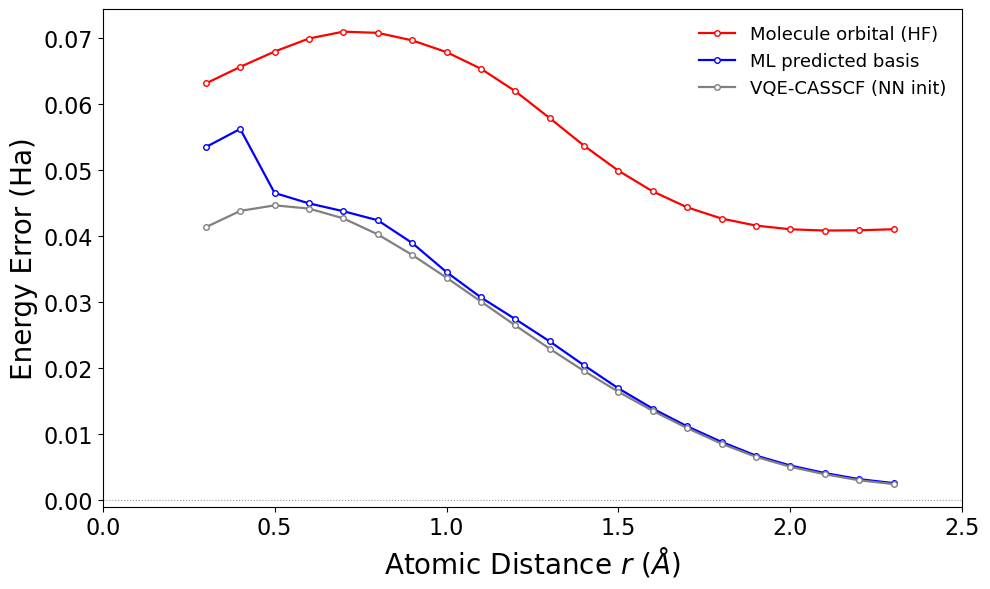

Saved: H4_basis_error.pdf


In [4]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42

BOND_START, BOND_STOP, BOND_STEP = 0.3, 2.3, 0.1
CASCI_DIR = Path("Data")
ELDATA_CANDIDATES = [Path("../fig2_H4/E_l_data.json")]
VQE_CASSCF_PATH = Path("../VQE-CASSCF/vqe_casscf_nn_energies.json")
OUT_PDF = "H4_basis_error.pdf"

def bond_grid(start=BOND_START, stop=BOND_STOP, step=BOND_STEP):
    n = int(round((stop - start) / step)) + 1
    return np.array([round(start + i*step, 1) for i in range(n)], dtype=float)

def load_ccpvdz_baseline(bonds):
    path = next((p for p in ELDATA_CANDIDATES if p.exists()), None)
    if path is None:
        raise FileNotFoundError("E_l_data.json not found at ../fig2_H4/E_l_data.json")
    with open(path, "r") as f:
        d = json.load(f)

    ed = d["energy_data"]
    ccp = np.array(ed["ccpVDZ"], dtype=float)

    # sort by the numeric prefix of each entry in name list
    name_l = ed.get("name", [])
    if name_l:
        numeric_values = np.array([int(str(name).split('.')[0]) for name in name_l])
        sorted_indices = np.argsort(numeric_values)
        ccp = ccp[sorted_indices]

    if len(ccp) < len(bonds):
        raise ValueError("ccpVDZ baseline shorter than requested bond grid.")
    return ccp[:len(bonds)]

def load_vqe_casci_series(results_dir: Path, bonds):
    hf, nn = [], []
    for r in bonds:
        fp = results_dir / f"vqe_casci_results_bond({r:.1f}).json"
        if not fp.exists():
            print(f"[warn] missing: {fp}")
            hf.append(np.nan); nn.append(np.nan); continue
        with open(fp, "r") as f:
            d = json.load(f)
        hf.append(d.get("hf_vqe_casci_energy", np.nan))
        nn.append(d.get("nn_vqe_casci_energy", np.nan))
    return np.array(hf, dtype=float), np.array(nn, dtype=float)

def load_vqe_casscf_hf(path: Path, bonds):
    if not path.exists():
        print(f"[warn] missing: {path}")
        return np.full_like(bonds, np.nan, dtype=float)
    with open(path, "r") as f:
        d = json.load(f)
    b_src = np.array(d.get("bond_lengths_A", []), dtype=float)
    e_src = np.array(d.get("energies_Ha", []), dtype=float)
    # align by exact 0.1 grid (rounded)
    idx = {round(float(b), 1): i for i, b in enumerate(b_src)}
    out = np.full_like(bonds, np.nan, dtype=float)
    for j, b in enumerate(bonds):
        i = idx.get(round(float(b), 1), None)
        if i is not None:
            out[j] = e_src[i]
    return out

def plot_basis_error(out_pdf=OUT_PDF):
    bonds = bond_grid()
    baseline = load_ccpvdz_baseline(bonds)
    hf_E, nn_E = load_vqe_casci_series(CASCI_DIR, bonds)
    casscf_hf_E = load_vqe_casscf_hf(VQE_CASSCF_PATH, bonds)

    err_hf = hf_E - baseline
    err_nn = nn_E - baseline
    err_casscf = casscf_hf_E - baseline

    plt.figure(figsize=(10, 6))

    plt.plot(bonds, err_hf, "o-", color="red",  label="Molecule orbital (HF)",
             markersize=4, markerfacecolor="white", linewidth=1.6)
    plt.plot(bonds, err_nn, "o-", color="blue", label="ML predicted basis",
             markersize=4, markerfacecolor="white", linewidth=1.6)

    # Grey dotted: VQE-CASSCF (HF init)
    if np.isfinite(err_casscf).any():
        plt.plot(bonds, err_casscf, "o-", markersize=4, markerfacecolor="white", color="grey", linewidth=1.6, label="VQE-CASSCF (NN init)")

    plt.xlabel(r"Atomic Distance $r$ ($\AA$)", fontsize=20)
    plt.ylabel("Energy Error (Ha)", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.grid(False)
    plt.xlim(0.0, 2.5)
    plt.xticks(np.arange(0.0, 2.5 + 1e-9, 0.5))
    plt.axhline(0.0, color="0.6", linewidth=0.8, linestyle=":")
    plt.legend(frameon=False, fontsize=13)
    plt.tight_layout()
    plt.savefig(out_pdf, metadata={"TextAsShapes": False})
    plt.show()
    plt.close()
    print(f"Saved: {out_pdf}")

if __name__ == "__main__":
    plot_basis_error()


/var/folders/2g/30fq15_16yvcsfwpd5x9z9p80000gn/T/ipykernel_12641/2335976018.py:83: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'Producer', 'ModDate', 'Title', 'Trapped', 'CreationDate', 'Author', 'Keywords', 'Creator', 'Subject'}.
  plt.savefig(out_pdf, metadata={"TextAsShapes": False})


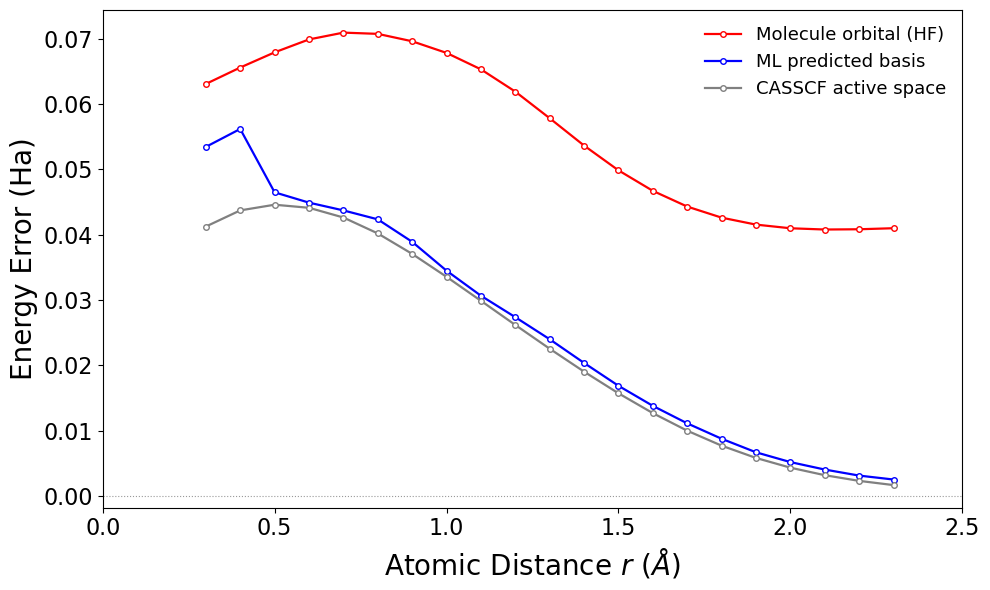

Saved: H4_basis_error(v2).pdf


In [5]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42

BOND_START, BOND_STOP, BOND_STEP = 0.3, 2.3, 0.1
CASCI_DIR = Path("Data")
ELDATA_CANDIDATES = [Path("../fig2_H4/E_l_data.json")]
OUT_PDF = "H4_basis_error(v2).pdf"

def bond_grid(start=BOND_START, stop=BOND_STOP, step=BOND_STEP):
    n = int(round((stop - start) / step)) + 1
    return np.array([round(start + i*step, 1) for i in range(n)], dtype=float)

def _load_sorted_from_E_l_data(bonds, keys):
    path = next((p for p in ELDATA_CANDIDATES if p.exists()), None)
    if path is None:
        raise FileNotFoundError("E_l_data.json not found at ../fig2_H4/E_l_data.json")
    with open(path, "r") as f:
        d = json.load(f)

    ed = d["energy_data"]
    name_l = ed.get("name", [])
    numeric_values = np.array([int(str(n).split(".")[0]) for n in name_l])
    sorted_idx = np.argsort(numeric_values)

    out = {}
    for k in keys:
        arr = np.array(ed[k], dtype=float)
        arr = arr[sorted_idx]
        out[k] = arr[:len(bonds)]
    return out

def load_vqe_casci_series(results_dir: Path, bonds):
    hf, nn = [], []
    for r in bonds:
        fp = results_dir / f"vqe_casci_results_bond({r:.1f}).json"
        if not fp.exists():
            print(f"[warn] missing: {fp}")
            hf.append(np.nan); nn.append(np.nan); continue
        with open(fp, "r") as f:
            d = json.load(f)
        hf.append(d.get("hf_vqe_casci_energy", np.nan))
        nn.append(d.get("nn_vqe_casci_energy", np.nan))
    return np.array(hf, dtype=float), np.array(nn, dtype=float)


def plot_basis_error(out_pdf=OUT_PDF):
    bonds = bond_grid()

    # Baseline FCI and classical CASSCF from E_l_data.json (sorted)
    series = _load_sorted_from_E_l_data(bonds, keys=["ccpVDZ", "CASSCF"])
    baseline = series["ccpVDZ"]
    casscf_E = series["CASSCF"]

    hf_E, nn_E = load_vqe_casci_series(CASCI_DIR, bonds)

    err_hf = hf_E - baseline
    err_nn = nn_E - baseline
    err_casscf = casscf_E - baseline

    plt.figure(figsize=(10, 6))

    plt.plot(bonds, err_hf, "o-", color="red",  label="Molecule orbital (HF)",
             markersize=4, markerfacecolor="white", linewidth=1.6)
    plt.plot(bonds, err_nn, "o-", color="blue", label="ML predicted basis",
             markersize=4, markerfacecolor="white", linewidth=1.6)
    plt.plot(bonds, err_casscf, "o-", color="grey", markersize=4,
             linewidth=1.6, markerfacecolor="white", label="CASSCF active space")

    plt.xlabel(r"Atomic Distance $r$ ($\AA$)", fontsize=20)
    plt.ylabel("Energy Error (Ha)", fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.grid(False)
    plt.xlim(0.0, 2.5)
    plt.xticks(np.arange(0.0, 2.5 + 1e-9, 0.5))
    plt.axhline(0.0, color="0.6", linewidth=0.8, linestyle=":")
    plt.legend(frameon=False, fontsize=13)
    plt.tight_layout()
    plt.savefig(out_pdf, metadata={"TextAsShapes": False})
    plt.show()
    plt.close()
    print(f"Saved: {out_pdf}")

if __name__ == "__main__":
    plot_basis_error()


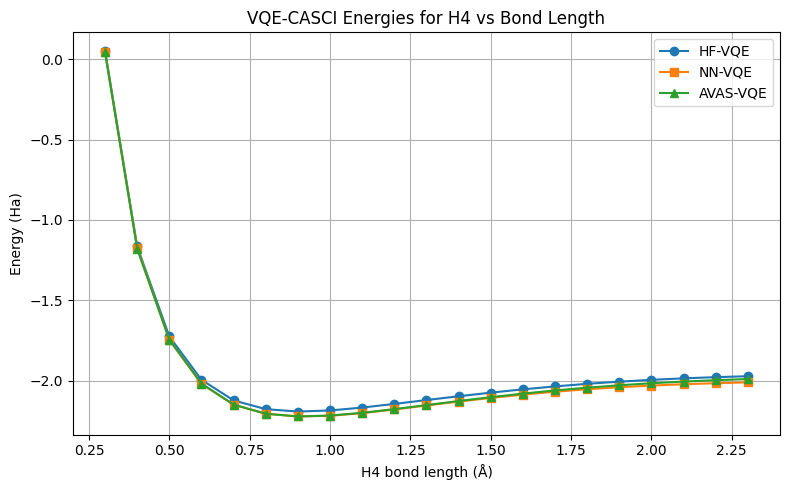

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def plot_vqe_energies_from_files(results_dir="/home/kgandhi63/Quantum-Chemistry-Wang-Group/vqe-casscf/results/fig3/Data3/", start=0.3, stop=2.3, step=0.1):
    bond_lengths = np.arange(start, stop + 1e-6, step)
    hf_energies = []
    nn_energies = []
    avas_energies = []

    for bl in bond_lengths:
        filename = Path(results_dir) / f"vqe_casci_results_bond({bl:.1f}).json"
        if filename.exists():
            with open(filename, "r") as f:
                data = json.load(f)
            hf_energies.append(data.get("hf_vqe_casci_energy", np.nan))
            nn_energies.append(data.get("nn_vqe_casci_energy", np.nan))
            avas_energies.append(data.get("avas_vqe_casci_energy", np.nan))
        else:
            print(f"Warning: File not found: {filename}")
            hf_energies.append(np.nan)
            nn_energies.append(np.nan)
            avas_energies.append(np.nan)

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(bond_lengths, hf_energies, 'o-', label="HF-VQE")
    plt.plot(bond_lengths, nn_energies, 's-', label="NN-VQE")
    plt.plot(bond_lengths, avas_energies, '^-', label="AVAS-VQE")
    plt.xlabel("H4 bond length (Å)")
    plt.ylabel("Energy (Ha)")
    plt.title("VQE-CASCI Energies for H4 vs Bond Length")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_vqe_energies_from_files()


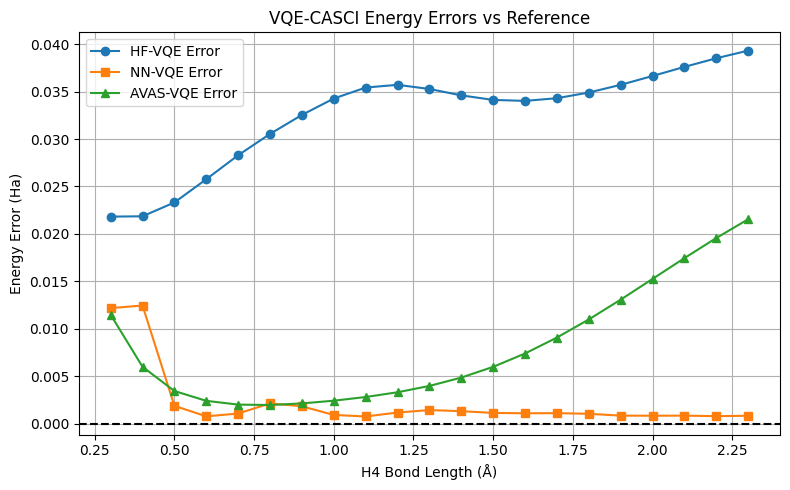

In [15]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.interpolate import interp1d

# Load VQE energies
def load_vqe_energies(results_dir="/home/kgandhi63/Quantum-Chemistry-Wang-Group/vqe-casscf/results/fig3/Data3/",
                      start=0.3, stop=2.3, step=0.1):
    bond_lengths = np.arange(start, stop + 1e-6, step)
    hf_energies = []
    nn_energies = []
    avas_energies = []

    for bl in bond_lengths:
        filename = Path(results_dir) / f"vqe_casci_results_bond({bl:.1f}).json"
        if filename.exists():
            with open(filename, "r") as f:
                data = json.load(f)
            hf_energies.append(data.get("hf_vqe_casci_energy", np.nan))
            nn_energies.append(data.get("nn_vqe_casci_energy", np.nan))
            avas_energies.append(data.get("avas_vqe_casci_energy", np.nan))
        else:
            hf_energies.append(np.nan)
            nn_energies.append(np.nan)
            avas_energies.append(np.nan)
    
    return bond_lengths, np.array(hf_energies), np.array(nn_energies), np.array(avas_energies)

# Load reference energies
def load_reference_energies(ref_dir="/home/kgandhi63/Quantum-Chemistry-Wang-Group/vqe-casscf/results/fig3/Data/"):
    bond_lengths = []
    reference_energies = []
    for filename in os.listdir(ref_dir):
        if filename.endswith(".json"):
            filepath = os.path.join(ref_dir, filename)
            with open(filepath, "r") as f:
                data = json.load(f)
                bond_lengths.append(data["bond_length"])
                reference_energies.append(data["reference_energy"])
    
    # Sort by bond length
    sorted_indices = np.argsort(bond_lengths)
    bond_lengths = np.array(bond_lengths)[sorted_indices]
    reference_energies = np.array(reference_energies)[sorted_indices]
    return bond_lengths, reference_energies

# Load data
bl_vqe, hf, nn, avas = load_vqe_energies()
bl_ref, ref = load_reference_energies()

# Interpolate reference energies to VQE bond lengths
ref_interp = interp1d(bl_ref, ref, kind='cubic', fill_value="extrapolate")
ref_at_vqe = ref_interp(bl_vqe)

# Compute energy errors
hf_error = hf - ref_at_vqe
nn_error = nn - ref_at_vqe
avas_error = avas - ref_at_vqe

# Plot energy errors
plt.figure(figsize=(8,5))
plt.plot(bl_vqe, hf_error, 'o-', label="HF-VQE Error")
plt.plot(bl_vqe, nn_error, 's-', label="NN-VQE Error")
plt.plot(bl_vqe, avas_error, '^-', label="AVAS-VQE Error")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("H4 Bond Length (Å)")
plt.ylabel("Energy Error (Ha)")
plt.title("VQE-CASCI Energy Errors vs Reference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
